<h2 style="font-size:28px;font-family:calibri">Dimensionality Reduction Using Feature Extraction</h2>

The goal of feature extraction for dimensionality reduction is to transform our set of features, poriginal, such that we end up with a new set, pnew, where poriginal > pnew,while still keeping much of the underlying information. Put another way, we reduce the number of features with only a small loss in our data’s ability to generate high-quality predictions.

**The goal of PCA:** finding a set of vectors (principal components) that best describe the spread and direction of your data across its many dimensions, allowing you to subsequently pick the *top-n best-describing ones for reducing the dimensionality of your feature space.*


In [40]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, NMF, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFECV, SelectPercentile, VarianceThreshold, SelectKBest, chi2, f_classif
from sklearn import datasets, linear_model

import warnings
warnings.filterwarnings("ignore")

<h2 style="font-size:28px;font-family:calibri">Reducing Features Using Principal Components</h2>
 Given a set of features, you want to reduce the number of features while retaining the variance (important information) in the data.

In [3]:
# Load the Data
digits = datasets.load_digits()

# Standardize the feature matrix.
features = StandardScaler().fit_transform(digits.data)

# Create a PCA that will retain 99% of variance
pca = PCA(n_components = 0.99, whiten = True)

In [4]:
features_pca = pca.fit_transform(features)
print(f"Orignal Number of Features: {features.shape[1]}")
print(f"Reduced Number of Features: {features_pca.shape[1]}")

Orignal Number of Features: 64
Reduced Number of Features: 54


In [5]:
print("Features")
print(features[0, :10])
print("\nPCA Features")
print(features_pca[0, :10])

Features
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926]

PCA Features
[ 0.70631939 -0.39512814 -1.73816236  1.01867007 -0.15512486  0.33067732
 -0.91244401  1.04016804  0.09234102 -0.61465809]


<h2 style="font-size:28px;font-family:calibri">Reducing Features When Data is Linearly Inseperable</h2>

In [6]:
def make_plot(x1, x2, y):
    plt.scatter(x1, x2, c = y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()

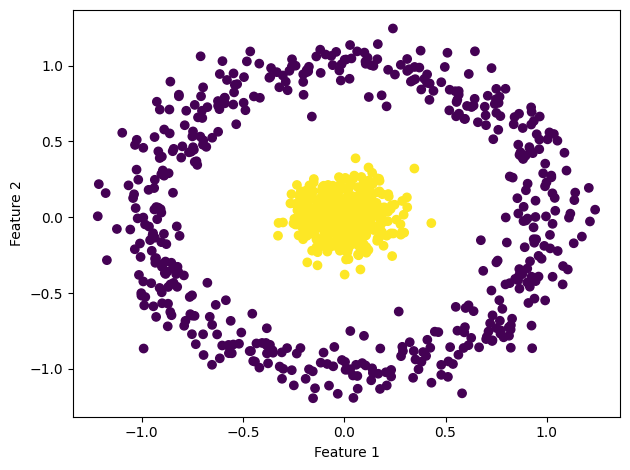

In [7]:
features, y = datasets.make_circles(n_samples = 1000, random_state = 1, noise = 0.1, factor = 0.1)
# Before using PCA
make_plot(features[:,0], features[:,1], y)

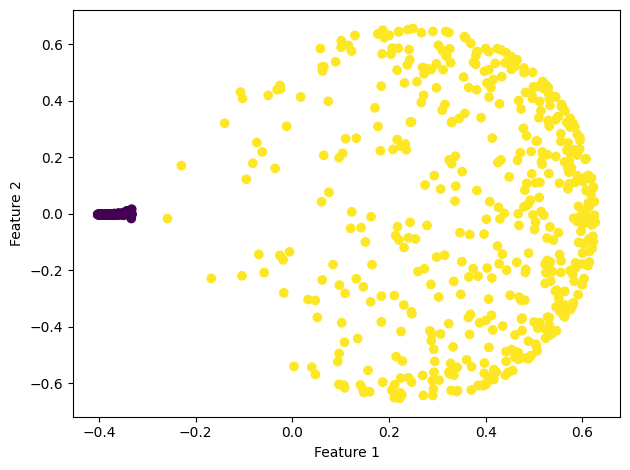

In [8]:
# After applying kernel PCA
kpca = KernelPCA(kernel = "rbf", gamma = 15, n_components = 2)
features_kpca = kpca.fit_transform(features)
make_plot(features_kpca[:, 0], features_kpca[:, 1], y)

<h2 style="font-size:28px;font-family:calibri">Reducing Features by Maximizing Class Separability</h2>

In [9]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
print(f"Features:\n{features[:5]}")
print(f"Targets:\n{target[:5]}")

Features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Targets:
[0 0 0 0 0]


In [10]:
lda = LinearDiscriminantAnalysis(n_components = 1)
features_lda = lda.fit(features, target).transform(features)

In [11]:
print(f"Orignal Number of Features: {features.shape[1]}")
print(f"Reduced Number of Features: {features_lda.shape[1]}")

Orignal Number of Features: 4
Reduced Number of Features: 1


In [12]:
lda.explained_variance_ratio_

array([0.9912126])

In [13]:
lda = LinearDiscriminantAnalysis(n_components = None)
features_lda = lda.fit(features, target)
lda_ratio = lda.explained_variance_ratio_
lda_ratio

array([0.9912126, 0.0087874])

In [14]:
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set Initial Variance
    tot_var = 0.0
    # Set Initial no of features
    n_components = 0

    for explained_var in var_ratio:
        tot_var += explained_var
        n_components += 1

        if tot_var >= goal_var:
            break
    return n_components

select_n_components(lda_ratio, 0.95)

1

<h2 style="font-size:28px;font-family:calibri">
    Reducing Features Using Non-Negative Matrix Factorization
</h2>

In [15]:
digits = datasets.load_digits()
features = digits.data
nmf = NMF(n_components = 10, random_state = 4)
features_nmf = nmf.fit_transform(features)

print(f"Orignal no. of Features: {features.shape[1]}")
print(f"Reduced no. of Features: {features_nmf.shape[1]}")

Orignal no. of Features: 64
Reduced no. of Features: 10


<h2 style="font-size:28px;font-family:calibri">
    Reducing Features on Sparse Data
</h2>
Using Truncated Singular Value Decomposition

In [16]:
features = StandardScaler().fit_transform(digits.data)
features_sparse = csr_matrix(features)
tsvd = TruncatedSVD(n_components = 10)

# Conduct a TSVD on Sparse matrix
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

print(f"Original no. of Features: {features_sparse.shape[1]}")
print(f"Reduced no. of Features: {features_sparse_tsvd.shape[1]}")

Original no. of Features: 64
Reduced no. of Features: 10


In [17]:
# The first 3 features explain 30% variance in the data.
(tsvd.explained_variance_ratio_ * 100)[:3].sum()

30.039385388062833

In [18]:
tsvd = TruncatedSVD(n_components = features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)
tsvd_var_ratio = tsvd.explained_variance_ratio_

select_n_components(tsvd_var_ratio, 0.95)

40

<h2 style="font-size:28px;font-family:calibri">
    Dimensionality Reduction using Feature Selection
</h2>

<h2 style="font-size:28px;font-family:calibri">
    Thresholding Numerical Feature Variance
</h2>
You have a set of numerical features and want to filter out those with low variance (i.e., likely containing little information)

In [19]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
features[:6]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [20]:
thresholder = VarianceThreshold(threshold = 0.5)
features_high_var = thresholder.fit_transform(features)
features_high_var[:6]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4]])

In [21]:
thresholder.fit(features).variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

If the features have been standardized (to mean zero and unit variance), then for obvious reasons variance thresholding will not work correctly.

In [22]:
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
selector = VarianceThreshold()
selector.fit(features_std).variances_

array([1., 1., 1., 1.])

<h2 style="font-size:28px;font-family:calibri">
    Thresholding Binary Feature Variance
</h2>

In [23]:
# Creating a Feature Matrix with:
# Feature 0: 80% class 0
# Feature 1: 80% class 1
# Feature 2: 60% class 0; 40% class 1
features = [[0, 1, 0],
           [0, 1, 1],
           [0, 1, 0],
           [0, 1, 1],
           [1, 0, 0]]
thresholder = VarianceThreshold(threshold = (.75 * (1 - 0.75)))
thresholder.fit_transform(features)

array([[0],
       [1],
       [0],
       [1],
       [0]])

<h2 style="font-size:28px;font-family:calibri">
    Handling Highly Correlated Features
</h2>
Use a correlation matrix to check for highly correlated features. If highly correlated features exist, consider dropping one of the correlated features

In [24]:
features =np.array([[1, 1, 1],
                    [2, 2, 0],
                    [3, 3, 1],
                    [4, 4, 0],
                    [5, 5, 1],
                    [6, 6, 0],
                    [7, 7, 1],
                    [8, 7, 0],
                    [9, 7, 1]])
df = pd.DataFrame(features)
corr_matrix = df.corr().abs()
corr_matrix

,0,1,2
0,1.000000,0.976103,0.000000
1,0.976103,1.000000,0.034503
2,0.000000,0.034503,1.000000


In [25]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [cols for cols in upper.columns if any(upper[cols] > 0.95)]

# Drop Features
df.drop(df.columns[to_drop], axis = 1).head()

,0,2
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1


In [26]:
features = iris.data
target = iris.target
features = features.astype(int)
chi2_selector = SelectKBest(chi2, k=2)
features_kbest = chi2_selector.fit_transform(features, target)
features_kbest[:5]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [27]:
 # Show results
 print("Original number of features:", features.shape[1])
 print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


In [29]:
fvalue_selector = SelectKBest(f_classif, k=2)
features_kbest = fvalue_selector.fit_transform(features, target)

In [31]:
print(f"Original no. of Features: {features.shape[1]}")
print(f"Reduced no. of Features: {features_kbest.shape[1]}")

Original no. of Features: 4
Reduced no. of Features: 2


In [36]:
fvalue_selector = SelectPercentile(f_classif, percentile = 75)
features_pbest = fvalue_selector.fit_transform(features, target)

In [37]:
print(f"Original no. of Features: {features.shape[1]}")
print(f"Reduced no. of Features: {features_pbest.shape[1]}")

Original no. of Features: 4
Reduced no. of Features: 3


In [46]:
features, target = datasets.make_regression(n_samples = 10000,
                                  n_features = 100,
                                  n_informative = 3,
                                  random_state = 1)
ols = linear_model.LinearRegression()
rfecv = RFECV(estimator = ols, step = 1, scoring = "neg_mean_squared_error")
rfecv.fit(features, target)
rfecv.transform(features)

array([[ 0.00850799,  0.7031277 , -0.75164317, -0.12241624],
       [-1.07500204,  2.56148527, -1.68392493,  1.21359184],
       [ 1.37940721, -1.77039484,  0.12954322, -1.08944064],
       ...,
       [-0.80331656, -1.60648007,  0.20986659,  0.52008573],
       [ 0.39508844, -1.34564911, -1.21942363,  0.14573746],
       [-0.55383035,  0.82880112,  0.05486622,  0.29868723]])

In [47]:
rfecv.n_features_

4

In [48]:
rfecv.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [49]:
rfecv.ranking_

array([34, 37, 31, 87, 67,  1, 79, 71, 13, 44, 89, 33, 35, 59, 17, 32, 40,
       11, 14,  5, 58, 91, 12, 56, 86,  4, 85, 60, 72, 55, 27,  9, 88, 52,
       54, 47, 95, 36, 76,  1,  1, 10, 24, 30, 94, 61, 68, 82, 15, 53, 78,
       63,  7, 51, 29, 97, 18, 23, 28, 81, 80,  8, 21, 96,  6, 57, 25, 49,
       45, 50, 83, 48, 84, 73, 62, 42, 93,  1, 41, 70, 16, 90,  3, 38, 39,
       46, 92, 75, 19, 64, 43, 66, 69, 26, 77, 65, 20,  2, 22, 74])

<h2 style="font-size:28px;font-family:calibri">
    DONE WITH DAY 7
</h2>